<a href="https://colab.research.google.com/github/willamesalmeida/machine_learning/blob/master/Regress%C3%A3o_Linear_Machine_learning_na_pr%C3%A1tica_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**O DATASET analisado trata da qualidade de vinhos e pode ser encontrado no seguinte sitio:**

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009 

In [781]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


#1 Fazendo os importes da biblioteca
* Para começar nosso trabalho vamos importar algumas bibliotecas. 

* A princípio, vamos importar a lib Numpy, que nós ajudaram a trabalhar com vetores e matrizes, além disso, também facilitará alguns cálculos matemáticos, e a lib Pandas, que nós ajudará na manipulação do nosso dataset. 

* Assim que necessárias outras blibliotecas, elas seram importadas aqui, mas suas explicações seram feita no momento que forem necessárias.

In [782]:
  import numpy as np
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.model_selection import train_test_split
  import pandas as pd
  import matplotlib.pyplot as plt
  import seaborn as sns
  from sklearn.linear_model import LinearRegression
  from sklearn.tree import DecisionTreeRegressor
  from sklearn.ensemble import RandomForestRegressor
  from sklearn.neural_network import MLPRegressor
  from sklearn.metrics import mean_absolute_error
  from sklearn.metrics import mean_squared_error
  from sklearn.model_selection import GridSearchCV
  from sklearn.model_selection import RandomizedSearchCV

# 2 Fazendo a leitura e o carregamento dos dados na memória
* Agora utilizando a lib pandas, vamos fazer o carregamento de nosso dataset na memória para que possamos começar nosso trabalho.

* Faremos algumas verificações em nosso dataset, primeiro vamos ver se está tudo ok em nossas colunas. Depois utilizaremos o head() para visualizar algumas linhas do nosso dataset. Por default, esse método retorna 5 linhas. 



In [783]:
#lendo o dataset Sobre qualidade de vinhos
dados = pd.read_csv('/content/drive//My Drive/Colab Notebooks/Dataset/winequality-red.csv')

* Fazendo a visualização das colunas do nosso arquivo.

In [784]:
#verificando as colunas do arquivo
dados.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

* visualizando algumas informações do dataset.

In [785]:
dados.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


* Fazendo a visualização das linhas utilizando o head().





In [786]:
#visualizando algumas linhas 
dados.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# 3 Tratando os dados e fazendo limpeza
* Nesta etapa faremos o tratamentos de nossos dados e para isso utilizaremos alguns métodos.

* Então, podemos remover dados NAN, remover valores null, remover dados duplicados, entre outros. 

* Também podemos utilizar algumas métricas para resolver esses tipos de problemas, quando existem valores null em uma coluna, por exemplo, podemos fazer a média de todos os valores que a coluna (atributo com valores faltantes) possui e colocar o resultado no lugar do valor null. 

* Logo abaixo verificamos a quantidade de colunas e linhas que nosso dataset possue.

In [787]:
#verificando a quantidade de linhas e colunas
dados.shape

(1599, 12)

* Agora faremos a remoção dos valores duplicados que existem em nossos dados. 

In [788]:
#removendo valores duplicados e visualizando se teve muita diferença utilizando shape (possuia alguns valores duplicados) 
#dados = dados.drop_duplicates()
dados.shape

(1599, 12)

* Podemos fazer também a remoção dos valores NAN, porém, nosso dataset não possuia valores NAN.

In [789]:
#Removendo os valores NAN (não possuia NAN)
dados = dados.dropna()
dados.shape

(1599, 12)

* Aqui utilizamos o método .isnull().sum() para que possamos visualizar a quantidade somada de valores null por atributos presente em nosso dataset.

In [790]:
#verificando a quantidade de valores nulos dentro do dataframe
dados.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

* A renomeação dos atributos é algo importante a se fazer porque, mais a frente, em nosso trabalho, precisaremos fazer referência (chamadas) a alguns desses atibutos. 

* Então, remover os espaços em branco dos atibutos de nomes compostos é importante para não nós depararmos com alguns erros inesperados.

* Sendo assim, abaixo subistituimos os espaços em branco dos nomes dos atributos por underline(_), depois utilizamos o head() para visualizar nossos dados com a nova nomeclatura.

In [791]:
#renomeando as colunas para failcitar a analise posteriormente
dados = dados.rename(columns={'fixed acidity':'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'residual sugar': 'residual_sugar', 'free sulfur dioxide':'free_sulfur_dioxide', 'total sulfur dioxide':'total_sulfur_dioxide','citric acid':'citric_acid' })
#Visualizando a tabela com a nova nomeclatura
dados.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#4 Análise preliminar dos dados
* Nesta etapa podemos fazer alguns plots de gráficos para ter algumas ideias e ter uma melhor visualização de como estão nossos dados. 

* Sabemos que a qualidados do nosso vinho esta sendo avaliadas por uma pontuação que vai de 0, para o vinhos de menor qualidade, a 10, para o vinhos de meaior qualidade. 

* Então, vamos verificar como está a distribuição dessa pontuação.

**Aqui, utilizaremos a biblioteca metaplotlib. Essa é
uma lib que auxilia na visualição e geração de gráficos. Seu import foi feito no começo desse notebook e foi apelidade de plt.**

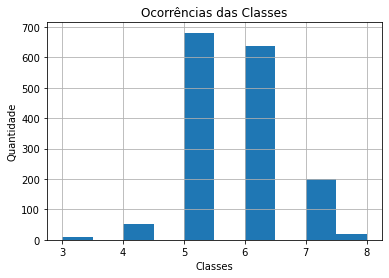

In [792]:
#verificando as pontuações da qualidade g
plt.hist(dados['quality'])
plt.xlabel('Classes')
plt.ylabel('Quantidade')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

* Pelo gráfico é possivel ver que não possuimos vinhos com as pontuações de melhor nem de pior qualidade.

* Vamos fazer alguns prints para visualizar melhor a quantidade de vinhos por cada pontuação.

In [793]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
print('Qualidade 1: ', dados[dados['quality']==1].shape[0])
print('Qualidade 2: ', dados[dados['quality']==2].shape[0])
print('Qualidade 3: ', dados[dados['quality']==3].shape[0])
print('Qualidade 4: ', dados[dados['quality']==4].shape[0])
print('Qualidade 5: ', dados[dados['quality']==5].shape[0])
print('Qualidade 6: ', dados[dados['quality']==6].shape[0])
print('Qualidade 7: ', dados[dados['quality']==7].shape[0])
print('Qualidade 8: ', dados[dados['quality']==8].shape[0])
print('Qualidade 9: ', dados[dados['quality']==9].shape[0])
print('Qualidade 10: ', dados[dados['quality']==10].shape[0])

Qualidade 1:  0
Qualidade 2:  0
Qualidade 3:  10
Qualidade 4:  53
Qualidade 5:  681
Qualidade 6:  638
Qualidade 7:  199
Qualidade 8:  18
Qualidade 9:  0
Qualidade 10:  0


* Podemos verificar a distribuição de alguns atributos que podem ser importantes para a classificação dos vinho.

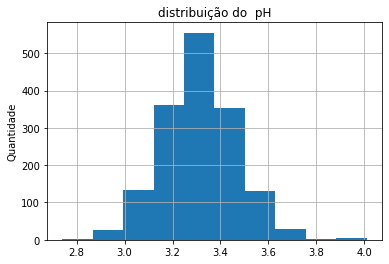

In [794]:
#verificando a distribuição do atibuto pH 
plt.hist(dados['pH'],10)
plt.ylabel('Quantidade')
plt.title('distribuição do  pH')
plt.grid(True)
plt.show()

* O PH dos vinhos não passam de 4.0 e a maior ocorrência é de vinhos com PH entre 3.2 e 3.4. 

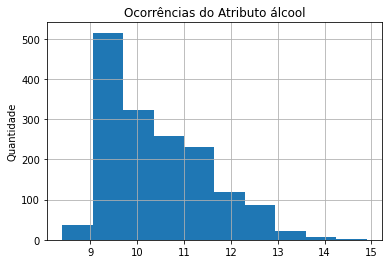

In [795]:
#verificando a distribuição do atibuto álcool
plt.hist(dados['alcohol'], 10)
plt.ylabel('Quantidade')
plt.title('Ocorrências do Atributo álcool')
plt.grid(True)
plt.show()

* O Teor alcoólico dos vinhos não passam de 15 sendo que a maior ocorrencia de teor alcoólico está entre 9 e 10.

* Para ter uma melhor visualização podemos utilizar um gráfico de barras para ver a influência de alguns atributos na qualidade dos vinhos.

* Podemos utilizar o gráfico de barras para comparaçoes entre dois atributos, sendo isso o que faremos a seguir. 

**Utilizaremos uma biblioteca chamada seaborn para plotar nossos gráficos de barras. Essa lib é baseada na metaplotlib, utilizaremos ela por questão de facilidade  na plotagem (pelo menos para esse caso facilitou), necessitando basicamente de uma linha de código.**

**Mas também é possivel utilizar a metaplotlib para gerar o gráfico de barras.**

**O importe da seaborn foi feito no começo do notebook e foi apelidada de sns.**


* Vamos plotar os atibutos para verificar quais influenciam mais na qualidado do vinho. Usaremos o gráfico de barras para fazer comparações entre o atibutos de qualidade e os demais atributos.

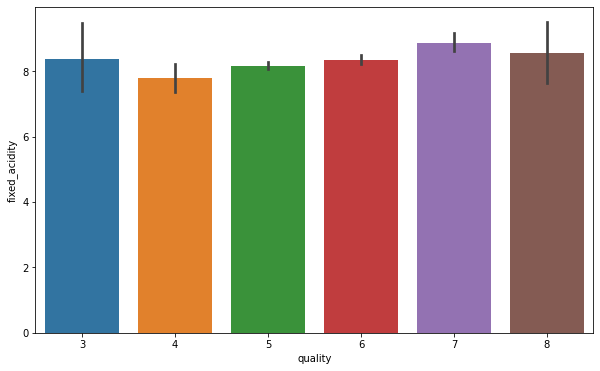

In [796]:

#Verificando a influência de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed_acidity', data = dados)

* O ácido fixo possui uma variação por cada pontuação, então, esse atributo não possui muita relação com a qualidade dos vinhos.

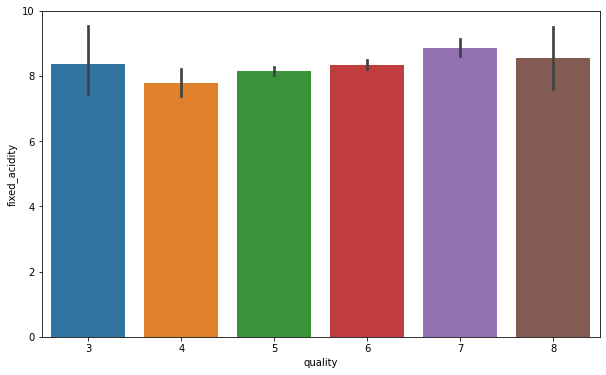

In [797]:
#Verificando a influência de alguns atributos para a qualidade do vinho 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'fixed_acidity', data = dados)

* Nesse caso vemos que a ácidez fixa não influência muito na qualidade do vinho. 

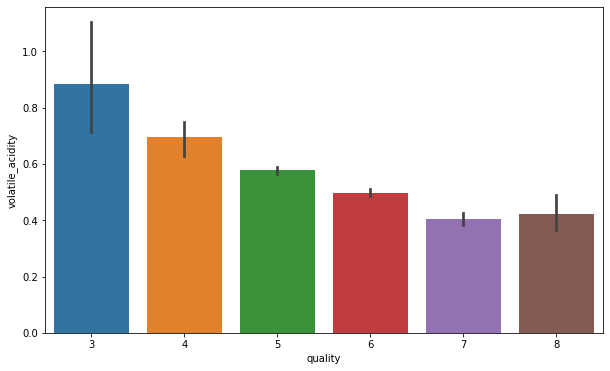

In [798]:
#Verificando a influência da acidez volatil na qualidade do vinh, 
#vemos que há uma queda na acidez volátil conforme aumentamos a qualidade
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'volatile_acidity', data = dados)

* Vemos que com o aumento da qualidade acontece uma diminuição da acidez volátil.

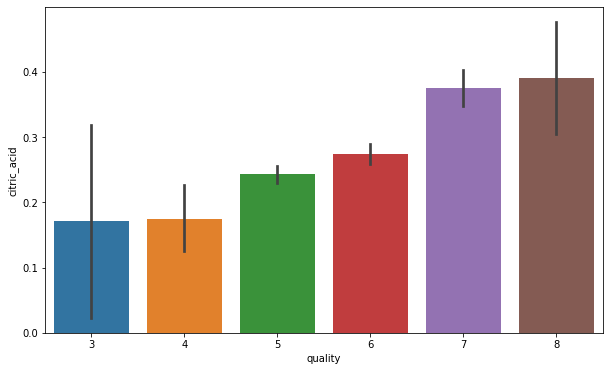

In [799]:
#Verificando a influência do acido citrico na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'citric_acid', data = dados)

* O ácido cítrico possui um crescimento conforme a qualidade do vinho também aumenta, possivelmente possui uma grande relação com a qualidade.

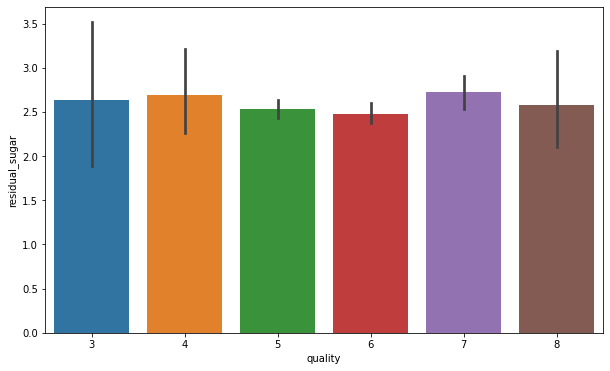

In [800]:
#Verificando a influencia do açucar residual na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'residual_sugar', data = dados)

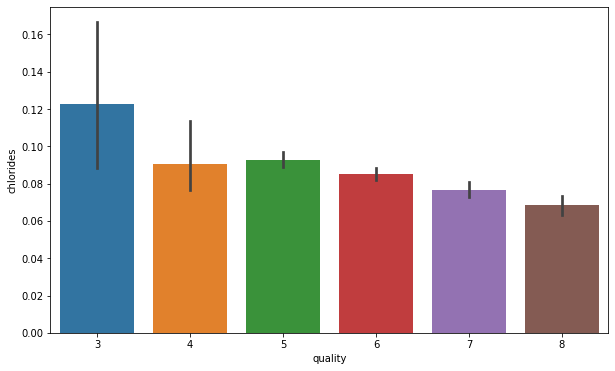

In [801]:
#Verificando a influência do cloreto na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'chlorides', data = dados)

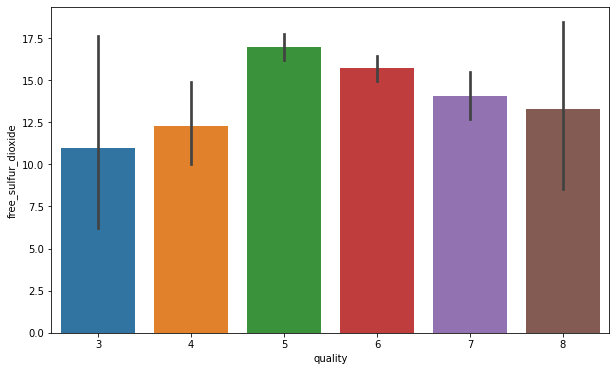

In [802]:
#Verificando a influencia do dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'free_sulfur_dioxide', data = dados)

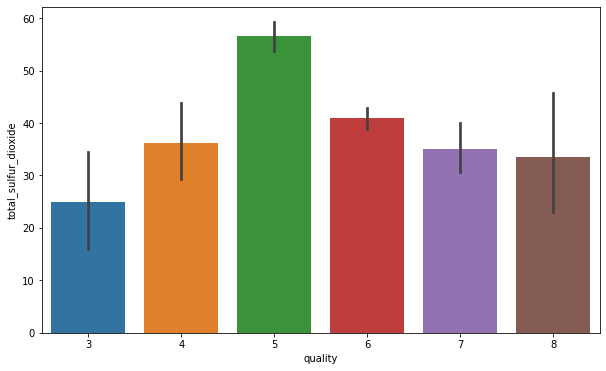

In [803]:
#Verificando a influencia do total de dioxido de enxofre na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'total_sulfur_dioxide', data = dados)

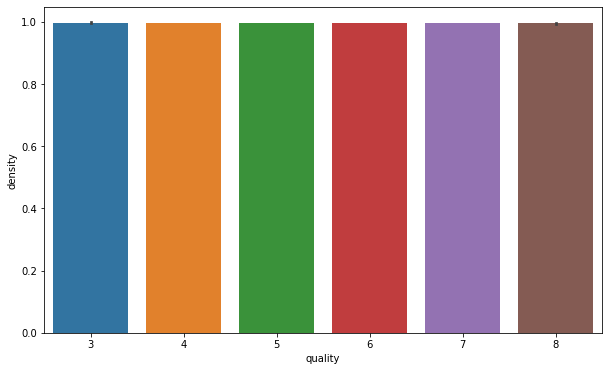

In [804]:
#Verificando a influência do density na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'density', data = dados)

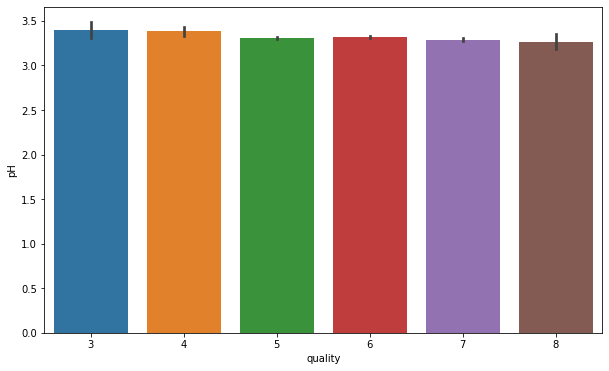

In [805]:
#Verificando a influência do pH na qualidade do vinho
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'pH', data = dados)

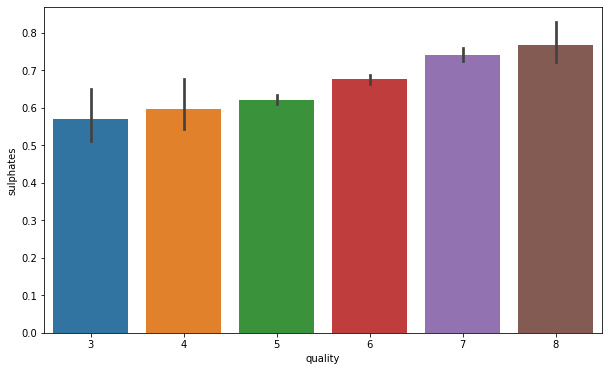

In [806]:
#Verificando a influência do sulfato na qualidade do vinho
#vemos que há um aumento na qualidade do vinho confrome aumenta a quantidade de sulfato
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'sulphates', data = dados)

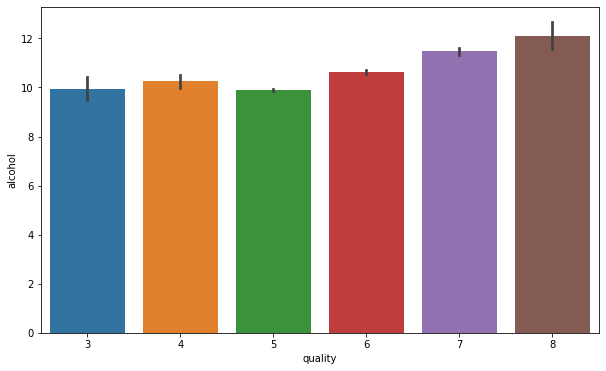

In [807]:
#Verificando a influência do álcool na qualidade do vinho
#Com o álcool acontece algo parecido com o que aconteceu com o sulfato. Porém, se diferência pela quantidade que tem pouca variação entre as pontuações de qualidade. 
fig = plt.figure(figsize = (10,6))
sns.barplot( x = 'quality', y = 'alcohol', data = dados)

* Vemos no plot acima que o alchool influência um pouco na qualidade do vinho. Os vinhos com maior teor alcoólico estão com pontuação maior de qualidade.
* Existem três atibutos que mais influênciam na qualidade do vinho, são eles: Ácidez citrica, Sulfato e o álcool.

* Então, Vamos visualizar a probabilidade desses atributos.


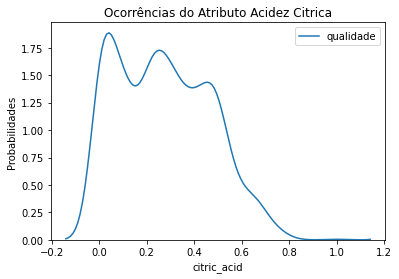

In [808]:
# Verificando a probabilidade da ácidez citrica
sns.distplot(dados.citric_acid, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Acidez Citrica')
plt.show()

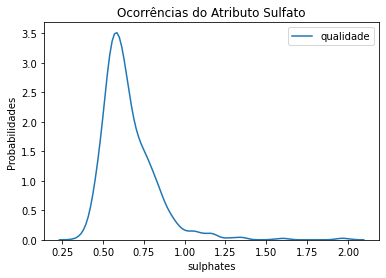

In [809]:
#Verificando o atibuto sulfato
sns.distplot(dados.sulphates, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Sulfato')
plt.show()

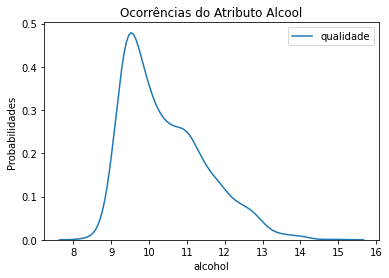

In [810]:
#Verificado o atributo Álcool
sns.distplot(dados.alcohol, hist=False, rug=False,label='qualidade')
plt.ylabel('Probabilidades')
plt.title('Ocorrências do Atributo Alcool')
plt.show()

**Boxpot**

verificando os pontos fora da curva, a mediana, e os quartis do atributo ácidez citrica.

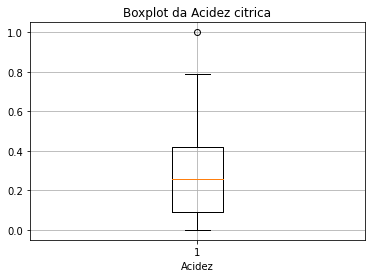

In [811]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot(dados.citric_acid)
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Acidez')
plt.grid()
plt.show()

Vamos separar as classes para poder fazer uma com comparação entre elas.

In [812]:
#Visualizando a quantidade de vinhos pelas pontuações de qualidade
qualidade_0 = dados[dados['quality']==0].drop(columns=['quality']).reset_index(drop=True)
qualidade_1 = dados[dados['quality']==1].drop(columns=['quality']).reset_index(drop=True)
qualidade_2 = dados[dados['quality']==2].drop(columns=['quality']).reset_index(drop=True)
qualidade_3 = dados[dados['quality']==3].drop(columns=['quality']).reset_index(drop=True)
qualidade_4 = dados[dados['quality']==4].drop(columns=['quality']).reset_index(drop=True)
qualidade_5 = dados[dados['quality']==5].drop(columns=['quality']).reset_index(drop=True)
qualidade_6 = dados[dados['quality']==6].drop(columns=['quality']).reset_index(drop=True)
qualidade_7 = dados[dados['quality']==7].drop(columns=['quality']).reset_index(drop=True)
qualidade_8 = dados[dados['quality']==8].drop(columns=['quality']).reset_index(drop=True)
qualidade_9 = dados[dados['quality']==9].drop(columns=['quality']).reset_index(drop=True)
qualidade_10 = dados[dados['quality']==10].drop(columns=['quality']).reset_index(drop=True)

* Vamos fazer um boxplot das pontuações, da ácidez citrica e também do alcool para ter uma comparação visual desses dados.

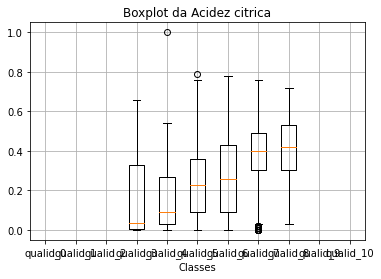

In [813]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot([qualidade_0.citric_acid,qualidade_1.citric_acid,qualidade_2.citric_acid,qualidade_3.citric_acid,
             qualidade_4.citric_acid,qualidade_5.citric_acid,qualidade_6.citric_acid,qualidade_7.citric_acid,
             qualidade_8.citric_acid,qualidade_9.citric_acid,qualidade_10.citric_acid],labels=['qualid_0',
             'qualid_1','qualid_2','qualid_3','qualid_4','qualid_5','qualid_6','qualid_7','qualid_8',
             'qualid_9','qualid_10'])
plt.title('Boxplot da Acidez citrica')
plt.xlabel('Classes')
plt.grid()
plt.show()

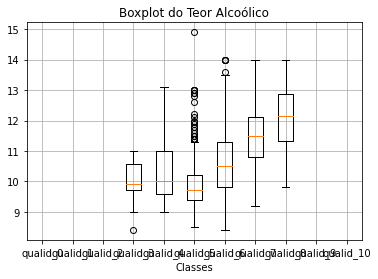

In [814]:
#plotando um dos atributos que tiveram maior influencia com a qualidade do vinho
plt.boxplot([qualidade_0.alcohol,qualidade_1.alcohol,qualidade_2.alcohol,qualidade_3.alcohol,
             qualidade_4.alcohol,qualidade_5.alcohol,qualidade_6.alcohol,qualidade_7.alcohol,
             qualidade_8.alcohol,qualidade_9.alcohol,qualidade_10.alcohol],labels=['qualid_0',
             'qualid_1','qualid_2','qualid_3','qualid_4','qualid_5','qualid_6','qualid_7','qualid_8',
             'qualid_9','qualid_10'])
plt.title('Boxplot do Teor Alcoólico')
plt.xlabel('Classes')
plt.grid()
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


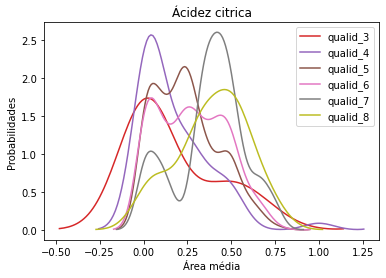

In [815]:
# distribuição de probabilidade comparando a area média para as classes
sns.distplot(qualidade_0.citric_acid, hist=False, rug=False,label='qualid_0')
sns.distplot(qualidade_1.citric_acid, hist=False, rug=False,label='qualid_1')
sns.distplot(qualidade_2.citric_acid, hist=False, rug=False,label='qualid_2')
sns.distplot(qualidade_3.citric_acid, hist=False, rug=False,label='qualid_3')
sns.distplot(qualidade_4.citric_acid, hist=False, rug=False,label='qualid_4')
sns.distplot(qualidade_5.citric_acid, hist=False, rug=False,label='qualid_5')
sns.distplot(qualidade_6.citric_acid, hist=False, rug=False,label='qualid_6')
sns.distplot(qualidade_7.citric_acid, hist=False, rug=False,label='qualid_7')
sns.distplot(qualidade_8.citric_acid, hist=False, rug=False,label='qualid_8')
sns.distplot(qualidade_9.citric_acid, hist=False, rug=False,label='qualid_9')
sns.distplot(qualidade_10.citric_acid, hist=False, rug=False,label='qualid_10')
plt.xlabel('Área média')
plt.ylabel('Probabilidades')
plt.title('Ácidez citrica')
plt.show()

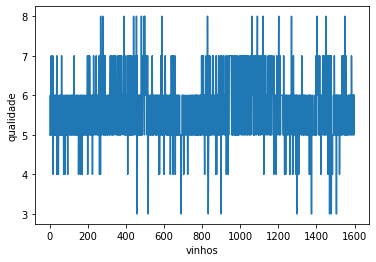

In [816]:

#plotando alugueis por dia
plt.plot(dados.quality)
plt.xlabel('vinhos')
plt.ylabel('qualidade')
plt.show()

# Análise estatística dos dados

* Visualizando as médias de cada pontuação das qualidades dos vinhos.

In [817]:
qualidade_3.mean()

fixed_acidity            8.360000
volatile_acidity         0.884500
citric_acid              0.171000
residual_sugar           2.635000
chlorides                0.122500
free_sulfur_dioxide     11.000000
total_sulfur_dioxide    24.900000
density                  0.997464
pH                       3.398000
sulphates                0.570000
alcohol                  9.955000
dtype: float64

In [818]:
qualidade_4.mean()

fixed_acidity            7.779245
volatile_acidity         0.693962
citric_acid              0.174151
residual_sugar           2.694340
chlorides                0.090679
free_sulfur_dioxide     12.264151
total_sulfur_dioxide    36.245283
density                  0.996542
pH                       3.381509
sulphates                0.596415
alcohol                 10.265094
dtype: float64

In [819]:
qualidade_5.mean()

fixed_acidity            8.167254
volatile_acidity         0.577041
citric_acid              0.243686
residual_sugar           2.528855
chlorides                0.092736
free_sulfur_dioxide     16.983847
total_sulfur_dioxide    56.513950
density                  0.997104
pH                       3.304949
sulphates                0.620969
alcohol                  9.899706
dtype: float64

In [820]:
qualidade_6.mean()

fixed_acidity            8.347179
volatile_acidity         0.497484
citric_acid              0.273824
residual_sugar           2.477194
chlorides                0.084956
free_sulfur_dioxide     15.711599
total_sulfur_dioxide    40.869906
density                  0.996615
pH                       3.318072
sulphates                0.675329
alcohol                 10.629519
dtype: float64

In [821]:
qualidade_7.mean()

fixed_acidity            8.872362
volatile_acidity         0.403920
citric_acid              0.375176
residual_sugar           2.720603
chlorides                0.076588
free_sulfur_dioxide     14.045226
total_sulfur_dioxide    35.020101
density                  0.996104
pH                       3.290754
sulphates                0.741256
alcohol                 11.465913
dtype: float64

In [822]:
qualidade_8.mean()

fixed_acidity            8.566667
volatile_acidity         0.423333
citric_acid              0.391111
residual_sugar           2.577778
chlorides                0.068444
free_sulfur_dioxide     13.277778
total_sulfur_dioxide    33.444444
density                  0.995212
pH                       3.267222
sulphates                0.767778
alcohol                 12.094444
dtype: float64

* **Vamos verificar a correlação existente entre nossos atributos.**

* **A correlação serve para medir a relação entre variaveis, em nosso caso, nós ajudará a verificar quais atributos possuem maior relação entre si.**

In [823]:
#verificando a correlação dos dados
corr = dados.corr()
corr

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


* O heat map auxilia visualmente na identificação das relações existentes entre os atributos.

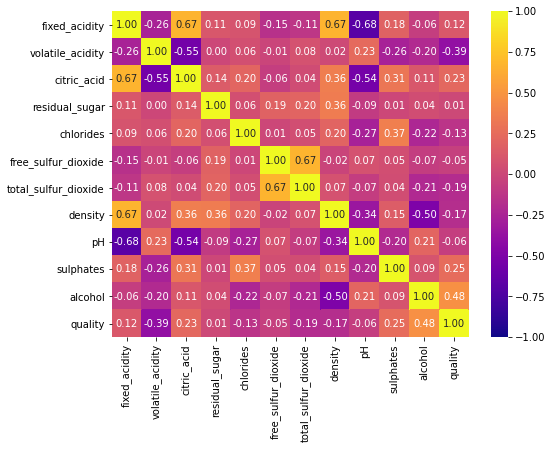

In [824]:
#Não possui muita correlação 
plt.figure(figsize=(8,6))
sns.heatmap(corr,vmin=-1, vmax=1, center=0, annot=True, fmt='.2f', cmap=plt.cm.plasma)


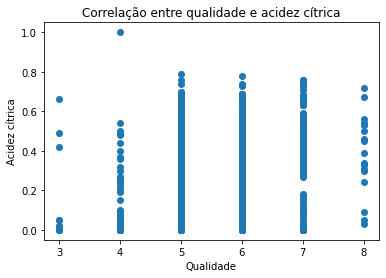

In [825]:
plt.scatter(dados.quality,dados.citric_acid)
plt.xlabel('Qualidade')
plt.ylabel('Acidez cítrica')
plt.title('Correlação entre qualidade e acidez cítrica')
plt.show()

* Quando é feito a plotagem de dispesão de qualquer atributo com a qualidade, o gráfico fica como acima, varios pontos agrupados, o que não ajuda muito na ánlise. 

* Então vamos utilizar o pairplot que faz a comparação de todos os atributos e podemos colocar para apresentar a qualidade.
* O pairplot plota a distribuição de cada atibutos, assim como as relações entre pares de atributos na forma de scatter plots.



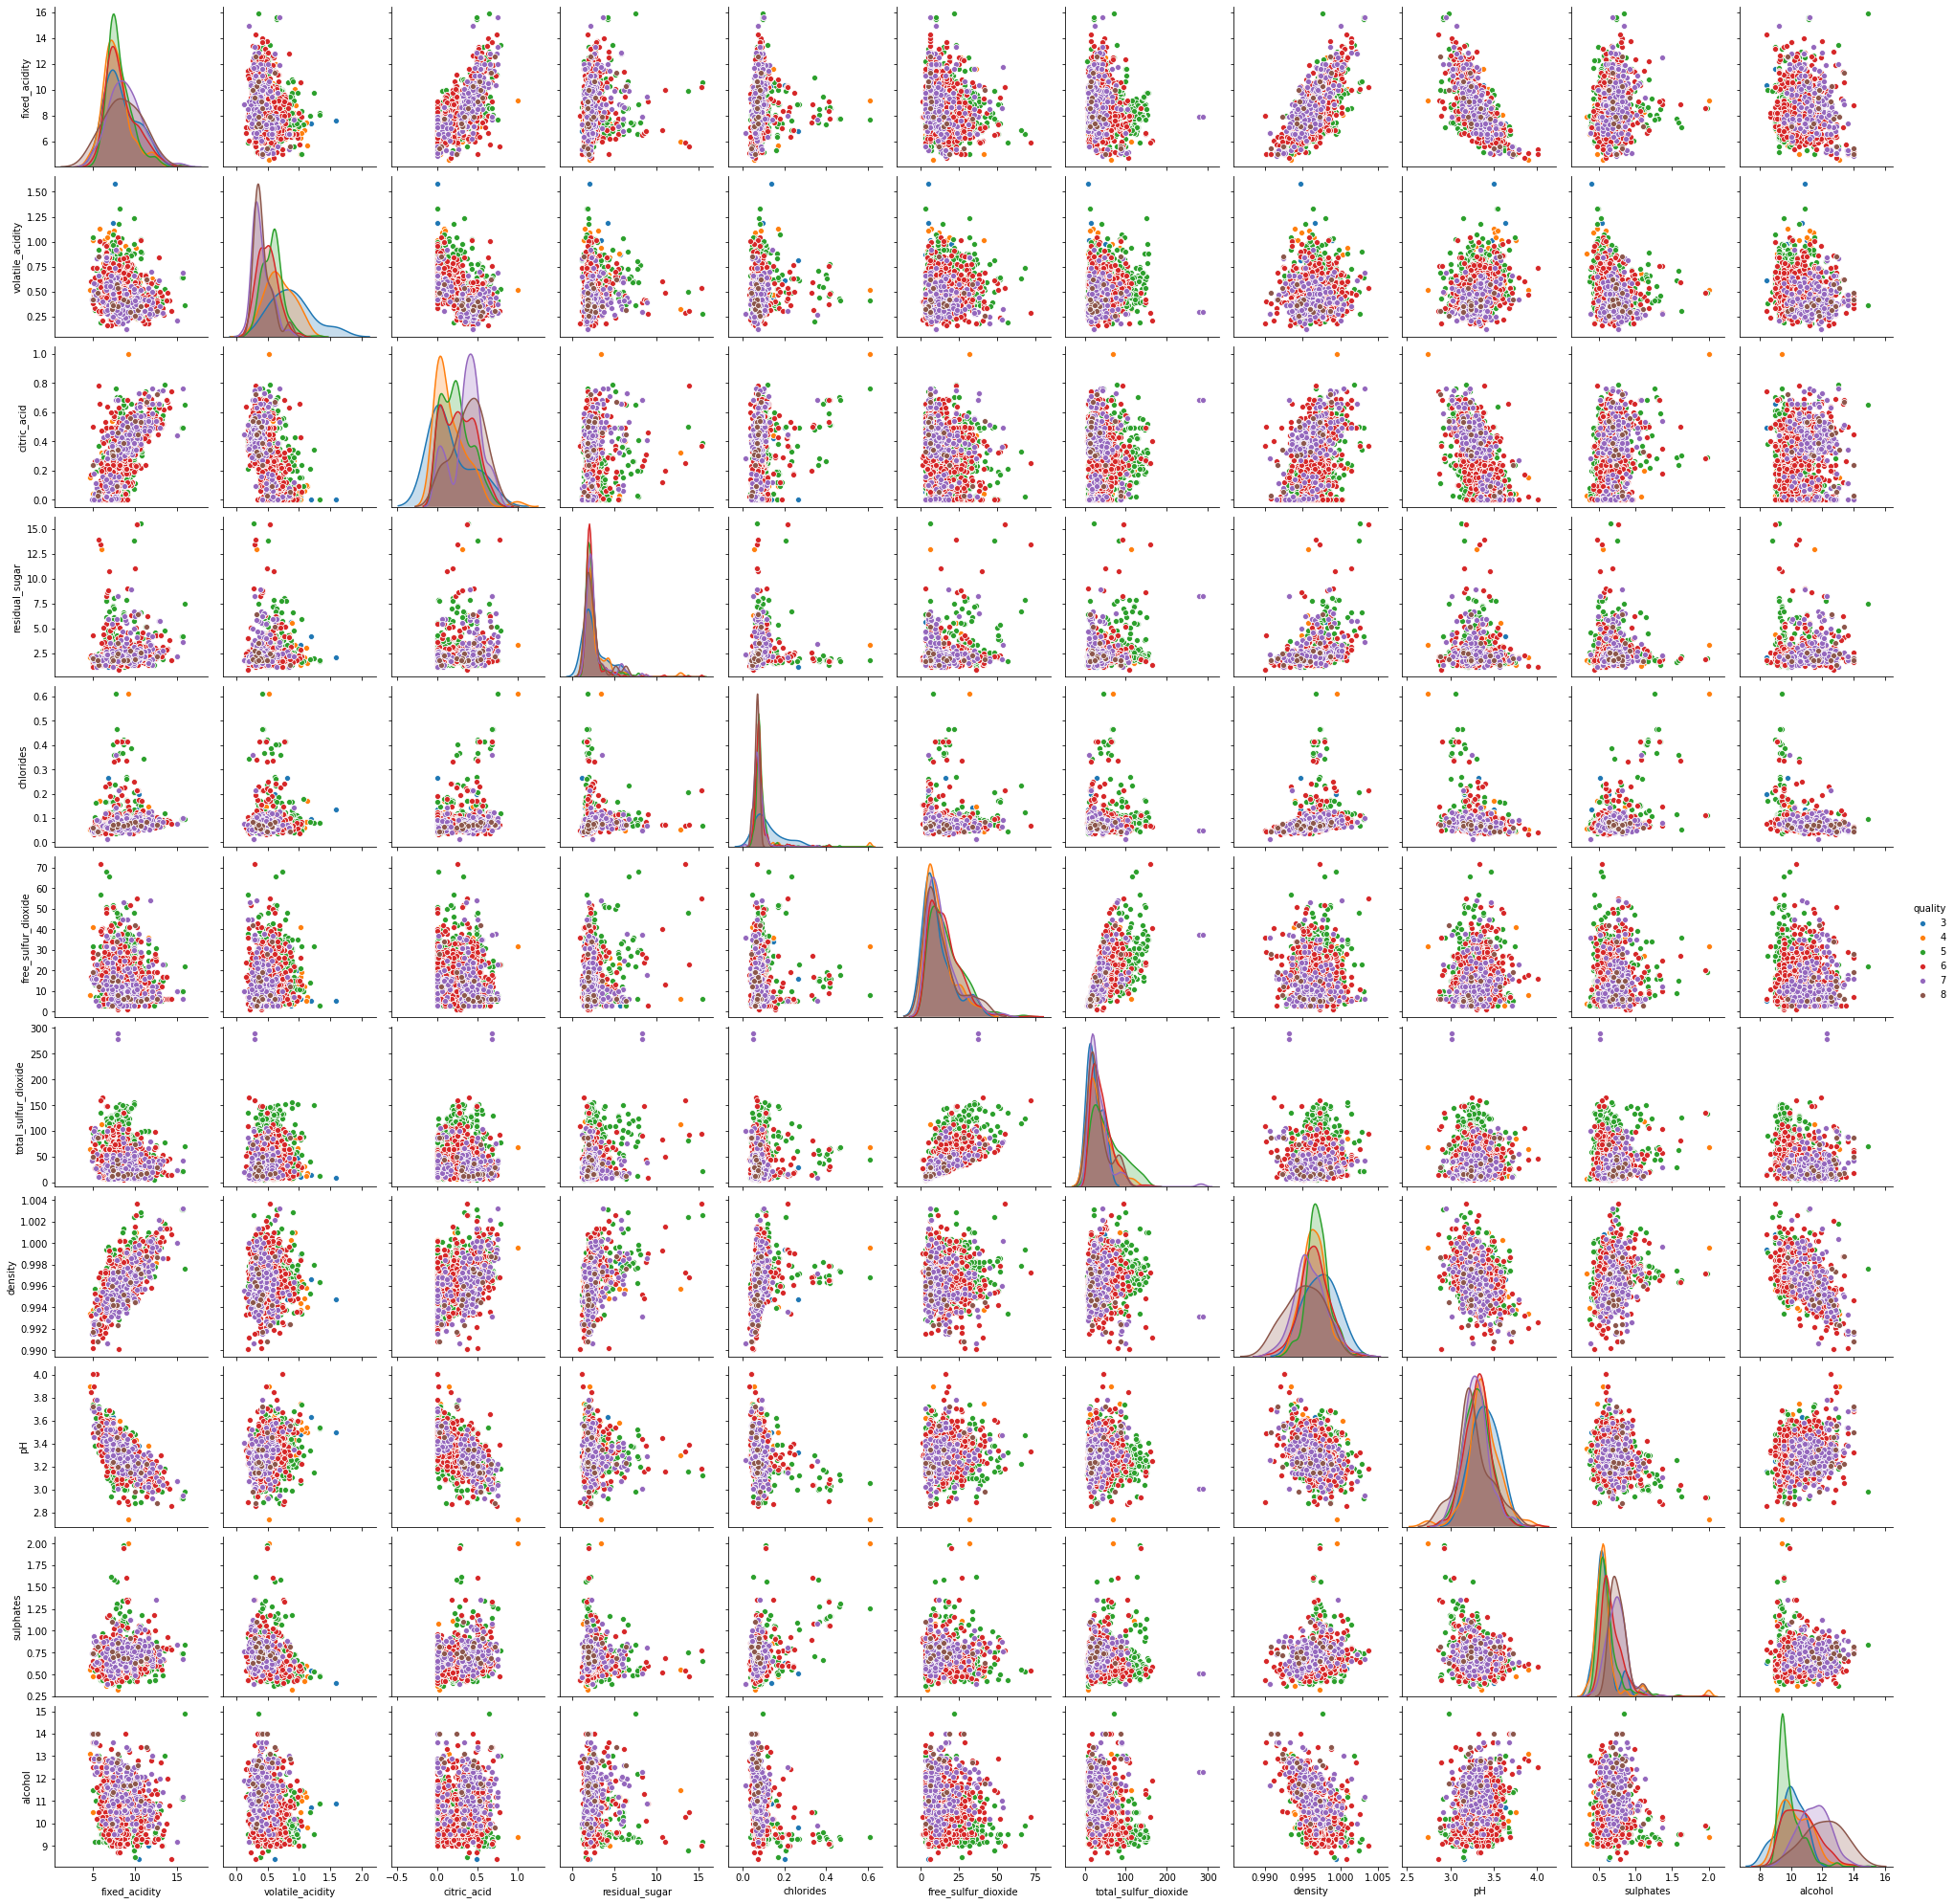

In [826]:
sns.pairplot(dados, hue='quality')

* Com o gráfico acima podemos ver a qualidade comparando entre pares de atributos. O pair plot pode fazer a plotagem, tanto da densidade, quanto do histograma.

# **Faremos uma binarização do nosso target alterando os valores da qualidade do vinho para bom(1) e ruim(0)**

* Fazendo classificação binária para a variável de resposta.
* Nesse caso vamos dividir em dois intervalos, de 2 - 6.5 e de 6.5 - 8 (bins)

In [827]:
#Dividindo o vinho em ruim(0) e bom(1) , dando o limite para a qualidade.
#bins = (2, 6.5, 8)
#bom_e_ruim = [0, 1]
#dados['quality'] = pd.cut(dados['quality'], bins = bins, labels = bom_e_ruim)

In [828]:
#dados.head()

In [829]:
#Agora vamos atribuir rótulos à nossa variável de qualidade
#label_quality = LabelEncoder()
#dados['quality'] = label_quality.fit_transform(dados['quality'])
#dados['quality'].value_counts()
#sns.countplot(dados['quality'])

#5 Fazendo a separação dos dados e a Reescala
* **Agora podemos dividir nossos dados em partes, uma para treino e outra para teste.**
* A ideia aqui é dividir os dados uma parte como os atributos descritores e outra com os atributos de classe. 

* **Atribui todas as colunas a X, exceto a quality:**


In [830]:
#Dividindo meus dados em atibutos descritores e atributos de classe 
X = dados.iloc[:,:-1]
X.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


 * **Fazendo a re-escala dos dados**

* Poderiamos utilizar outras formas de reescalar em nossos dados, até mesmo uma função pronta para o minimo e o maximo. Algumas reescalas:
* **MinMaxScaler:** É feito sobre a coluna, e seu resultado fica com valores de 0s e 1s. 
 * Formula: valor = ( valor — Coluna.min) / (Coluna.max — Coluna.min)

 * importe: from sklearn.preprocessing import MinMaxScaler
* **Normalze:** Age fazendo a reescala dos dados por linhas, diferente do MinMax que faz as reescalas por colunas. 

 * importe: from sklearn.preprocessing import Normalizer
* **StandardScaler:**Assim como o MinMax, também age sobre a coluna, a diferença está nos valores que utiliza para fazer a reescala.

  * formula: valor = (valor — média) / desvioPadão

  * importe: from sklearn.preprocessing import StandardScaler


In [831]:
X = (X - X.min())/(X.max() - X.min())
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
1594,0.141593,0.328767,0.08,0.075342,0.130217,0.436620,0.134276,0.354626,0.559055,0.149701,0.323077
1595,0.115044,0.294521,0.10,0.089041,0.083472,0.535211,0.159011,0.370778,0.614173,0.257485,0.430769
1596,0.150442,0.267123,0.13,0.095890,0.106845,0.394366,0.120141,0.416300,0.535433,0.251497,0.400000
1597,0.115044,0.359589,0.12,0.075342,0.105175,0.436620,0.134276,0.396476,0.653543,0.227545,0.276923


* **Segunda parte dos dados:**

In [832]:
#dividindo os dados
y = dados.quality
y

0       5
1       5
2       5
3       6
4       5
       ..
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, Length: 1599, dtype: int64

* Separando 20% dos dados para teste e 80% para treino


In [833]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)#random_state=42

# 6 Treinando os modelos e fazendo previsão

* **Vamos chamar nosso modelo, Regressão Linear, fazer o treinamento e a predição.** 

In [834]:
#definindo modelo de regressão linear
linear = LinearRegression()
linear.fit(X_train,y_train)
pred_linear = linear.predict(X_test)

* Agora podemos fazer uma plotagem dos dados reais em comparação aos nossos dados preditos.


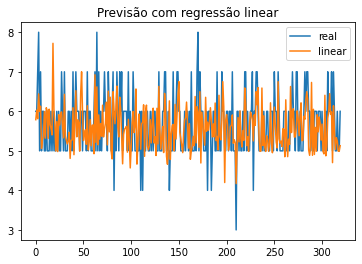

In [835]:
#plotando resultados
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_linear,label='linear')
plt.legend()
plt.title('Previsão com regressão linear')
plt.show()

* Visualizando os valores preditos em comparação em uma tabela

In [836]:
tabela= pd.DataFrame({'Real':y_test,'Predição':pred_linear})
tabela['Predição']= round(tabela['Predição'],2)
tabela

,Real,Predição
380,6,5.79
301,6,6.03
958,7,5.81
828,8,6.44
1077,5,6.00
...,...,...
1232,5,5.33
1195,6,5.25
1032,5,4.99
1400,5,4.99


* Podemos notar que os valores preditos em algumas linhas se execederam, enquanto que em outras foram um pouca baixo e outras chegaram bem proximos


* Podemos visualizar uma estimativa do coeficiente da predição

In [837]:
linear.coef_

array([ 0.32859452, -1.82488621, -0.32747097,  0.51248823, -1.02599305,
        0.23867753, -0.69706864, -0.24411058, -0.63597442,  1.55260179,
        1.97093093])



---



* **Vamos chamar nosso modelo de Ávore de Decisão para Regressão, treinar e fazer a predição.**

In [838]:
#definindo modelo de árvore de decisão
arvore = DecisionTreeRegressor()
arvore.fit(X_train,y_train)
pred_arvore = arvore.predict(X_test)

* Vamos plotar os dados obtidos e comparar com os reais.

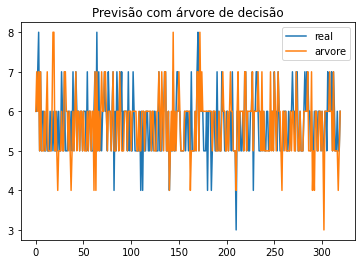

In [839]:
#plotando resultados da árvore de decisão
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_arvore,label='arvore')
plt.legend()
plt.title('Previsão com árvore de decisão')
plt.show()

* Notamos que alguns valores também se excederam e outros foram baixos, porém, os resultados foram melhores do que no modelo de regressão linear.

---



* **Vamos chamar nosso modelo da Random Florest para Regressão, treinar e fazer a predição.**




In [840]:
#definindo modelo de random forest
floresta = RandomForestRegressor(n_estimators=100)
floresta.fit(X_train,y_train)
pred_floresta = floresta.predict(X_test)

* Vamos plotar os dados obtidos e comparar com os reais.

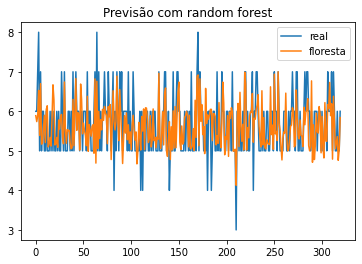

In [841]:
#plotando resultados da random forest
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_floresta,label='floresta')
plt.legend()
plt.title('Previsão com random forest')
plt.show()

* Notamos que alguns valores também se excederam, nesse modelo foram menos do que nos outros modelos.

---



In [842]:
print(pred_floresta)

[5.89 5.74 5.88 6.53 5.39 6.7  5.17 5.19 5.54 5.9  5.21 6.05 6.14 5.1
 5.17 5.34 5.12 5.83 6.67 6.3  5.15 5.17 5.34 5.09 5.78 5.55 5.89 5.92
 5.34 5.18 6.74 5.56 5.19 5.54 5.51 5.52 5.2  5.05 5.08 6.3  5.13 5.99
 6.83 5.52 5.97 5.92 5.02 6.69 6.3  5.43 5.7  5.52 5.39 5.13 6.38 4.99
 5.66 5.53 5.37 5.62 5.66 4.94 6.82 4.69 6.76 5.06 6.   5.31 5.79 5.53
 6.05 5.77 6.12 5.96 5.89 5.18 6.12 5.86 6.17 4.78 5.6  6.52 5.74 5.53
 5.74 6.89 5.81 5.26 6.55 5.98 5.38 4.68 5.3  5.89 5.45 5.96 5.28 5.66
 5.19 5.48 5.03 5.65 5.9  5.55 5.27 5.48 4.67 5.   5.72 5.34 5.02 5.87
 5.5  6.06 5.03 6.09 6.08 5.79 5.21 5.31 5.89 5.1  5.28 6.06 5.26 5.34
 5.08 5.35 5.29 6.96 5.32 5.06 5.43 5.99 5.15 6.43 6.59 5.   4.86 5.24
 5.74 4.78 5.61 5.02 6.01 5.07 6.12 5.08 5.83 6.47 6.74 5.22 5.03 5.63
 5.17 5.23 5.85 5.89 6.   5.9  5.1  5.9  5.05 5.07 5.12 5.56 5.01 6.28
 5.34 6.88 6.92 5.13 6.82 5.75 6.17 5.41 5.61 4.93 6.58 5.69 5.91 5.8
 5.91 6.05 6.05 5.26 5.94 5.94 5.87 5.15 5.38 5.19 6.22 5.37 5.08 5.69
 6.74 6.

* **Vamos chamar nosso modelo da Random Florest para Regressão, treinar e fazer a predição.**

In [843]:
#define modelo MLP
mlp = MLPRegressor(hidden_layer_sizes=(200,50),activation='logistic',max_iter=1000)
mlp.fit(X_train,y_train)
pred_mlp = mlp.predict(X_test)

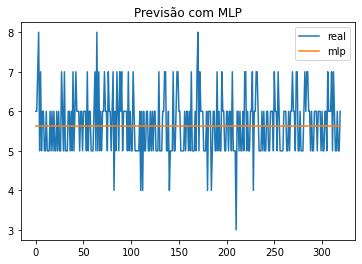

In [844]:
#plotando resultados da MLP
plt.plot(y_test.reset_index(drop=True),label='real')
plt.plot(pred_mlp,label='mlp')
plt.legend()
plt.title('Previsão com MLP')
plt.show()

In [845]:
print(pred_mlp)

[5.62570546 5.62670974 5.62801608 5.63030547 5.63033038 5.63164794
 5.62700647 5.62259092 5.62705736 5.62757545 5.62342325 5.62973029
 5.63022006 5.63220068 5.63499435 5.62935665 5.62559807 5.63114478
 5.64041404 5.6308219  5.62504527 5.62464611 5.62259752 5.6273693
 5.62932941 5.62795598 5.62568335 5.6254727  5.62691077 5.6226744
 5.62892294 5.62339942 5.62236922 5.62480828 5.62992465 5.62417875
 5.63538602 5.62567394 5.61932811 5.63301178 5.62563434 5.62517039
 5.62715654 5.62096937 5.62518909 5.62578395 5.62542885 5.63207417
 5.62851411 5.63057481 5.62656107 5.62429685 5.62289665 5.62552099
 5.626361   5.62964174 5.62746503 5.62591935 5.63265864 5.62667885
 5.63206293 5.63231493 5.63050875 5.62585649 5.62963463 5.63152331
 5.62874244 5.62482881 5.62823659 5.62769884 5.62903106 5.62760894
 5.62815606 5.6288719  5.63769848 5.62808086 5.62968881 5.63051302
 5.63314929 5.622854   5.62941583 5.63425891 5.62833175 5.6264373
 5.63291768 5.62762403 5.62617228 5.62757443 5.62822366 5.6290404


* O modelo MLP foi o que obteve piores resultados em sua predição. Aparentemente os valores preditos estão entre 5 e 6 para a qualidade dos vinhos.
---



# 7 Avaliando Modelos

* **É necéssario fazer o importe das métricas para a avaliação. Os importes no ínicio desse notebook.**



* Utilizaremos 4 métricas para avaliar nossos modelos:
  *   Mean Absolute Error (MAE)
  *   Mean Squared Error (MSE)
  *   Root Mean Squared Error (RMSE)
  *   Mean Absolute Percentage Error (MAPE)



* **Mean Absolute Error (MAE**)
> Essa função calcula o valor absoluto da diferença entre o valor predito e o valor real.




In [846]:
#Mae Regressão Linear
mean_absolute_error(y_test,pred_linear)

0.5367217766467769

In [847]:
#Mae Árvore
mean_absolute_error(y_test,pred_arvore)

0.46875

In [848]:
#Mae Random Forest
mean_absolute_error(y_test,pred_floresta)

0.4375

In [849]:
#Mae MLP
mean_absolute_error(y_test,pred_mlp)

0.674393204867066



---



* **Mean Squared Error (MSE)**
> Esta função calcula a média dos erros do nosso modelo ao quadrado.



In [850]:
#Mse Regressão Liear
mean_squared_error(y_test,pred_linear)

0.4937526823895439

In [851]:
#Mse Árvore
mean_squared_error(y_test,pred_arvore)

0.58125

In [852]:
#Mse Random Florest
mean_squared_error(y_test,pred_floresta)

0.35757249999999996

In [853]:
#Mse MLP
mean_squared_error(y_test,pred_mlp)

0.6194352921125803



---



* **Root Mean Squared Error (RMSE)**
> Esta função  calcula "a raiz quadrática média" dos erros entre valores reais e predição. 



In [854]:
#Rmse Regressão linear
mean_squared_error(y_test,pred_linear)**(1/2)

0.7026753748279101

In [855]:
#Rmse Ávore
mean_squared_error(y_test,pred_arvore)**(1/2)

0.7623975340988454

In [856]:
#Rmse Random Florest 
mean_squared_error(y_test,pred_floresta)**(1/2)

0.5979736616273329

In [857]:
#Rmse MLP
mean_squared_error(y_test,pred_mlp)**(1/2)

0.7870421158442414



---



* **Mean Absolute Percentage Error (MAPE)**


> Esta função calcula média percentual do erro absoluto entre os valores reais e a predição



In [858]:
def mean_absolute_percentage_error(y_test,y_pred):
  y_test=y_test.values
  erro = 0
  for i in range(len(y_test)):
    erro += abs(y_test[i]-y_pred[i])/y_test[i]
  return erro/len(y_test)

In [859]:
#Mape Regressão Linear 
mean_absolute_percentage_error(y_test,pred_linear)

0.09488169897884582

In [860]:
#Mape Árvore
mean_absolute_percentage_error(y_test,pred_arvore)

0.0843787202380952

In [861]:
#Mape Random Florest
mean_absolute_percentage_error(y_test,pred_floresta)

0.07797734374999991

In [862]:
#Mape MLP 
mean_absolute_percentage_error(y_test,pred_mlp)

0.120101203253728



---



# 8 Otimização de Parâmetros

* A otimização de parâmetros, consiste, basicamente, em procurar ou encontrar a melhor configuração para os parâmentros do nosso modelo.
* Para isso, podemos utilizar algumas "estratégias" que nós auxiliam a encontrar essas melhores configurações sem precisar testar todas as formas possiveis até encontra-la.
* Aqui utilizaremos dois métodos de busca exaustiva, que são:
  * Random Search: Faz uma seleção aleatória de alguns parâmetros dentro de uma grade de parâmetros(param_grid) predefinidos e então, faz o treinamento com essa seleção aleatória até encontrar melhor combinação de parâmetros.  
  
  * Grid Search: Faz uma busca pelos parâmetros que obtiverem o melhor score, fazendo o teste em cada combinação de valores dos parametros dentro da grade predefinida.  

* Abaixo, definimos a nossa grade de parâmetros que passaremos para os dois métodos de busca exaustiva:


* Vamos definir nosso modelo de regressão linear

In [863]:
linear_estimator = LinearRegression()

* Vamos definir as métricas de regressão, pode ser encontrada nesse link:

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

In [864]:
metricas = ['explained_variance', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'r2']

* vamos precisar definir um dicionário com os parâmetros do nosso estimador, então vamos utilizar o get_params().key() para verificar os nomes.

In [865]:
linear_estimator.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])

* Agora definimos nosso params_grid.

In [866]:
params_grid=  {'fit_intercept':[True, False],
              'normalize':[True, False],
               'copy_X':[True, False]}



---



* **Fazemos a chamada a nossa GridSearch passando os parâmetros necessários:** 

In [867]:
regression_grid = GridSearchCV(linear_estimator, param_grid=params_grid, scoring=metricas, verbose=100, refit='neg_mean_squared_error', return_train_score=False)

* Agora treinamos nosso modelo

In [868]:
regression_grid.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, explained_variance=0.132, neg_mean_absolute_error=-0.523, neg_mean_squared_error=-0.445, neg_mean_squared_log_error=-0.010, neg_median_absolute_error=-0.424, r2=0.132, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X=True, fit_intercept=True, normalize=True, explained_variance=0.328, neg_mean_absolute_error=-0.526, neg_mean_squared_error=-0.452, neg_mean_squared_log_error=-0.010, neg_median_absolute_error=-0.429, r2=0.319, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] copy_X=True, fit_intercept=True, normalize=True .................
[CV]  copy_X

GridSearchCV(cv=None, error_score=nan,
             estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                        n_jobs=None, normalize=False),
             iid='deprecated', n_jobs=None,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             pre_dispatch='2*n_jobs', refit='neg_mean_squared_error',
             return_train_score=False,
             scoring=['explained_variance', 'neg_mean_absolute_error',
                      'neg_mean_squared_error', 'neg_mean_squared_log_error',
                      'neg_median_absolute_error', 'r2'],
             verbose=100)

* Podemos chamar algumas funções para verificar e melhor combinação de parametros.

In [869]:
print(regression_grid.best_params_)

{'copy_X': True, 'fit_intercept': True, 'normalize': False}


* Podemos também verificar o melhor score obtido.

In [870]:
print(round(regression_grid.best_score_,3))

-0.437


* Podemos ver todos os resultados obtidos utilizando o cv_results_.

In [871]:
regression_grid.cv_results_

{'mean_fit_time': array([0.00658283, 0.00380478, 0.00355382, 0.00366468, 0.00424953,
        0.00351825, 0.00547605, 0.00323319]),
 'mean_score_time': array([0.00424824, 0.00343103, 0.00352187, 0.00344319, 0.00475225,
        0.00322118, 0.0037107 , 0.00308876]),
 'mean_test_explained_variance': array([ 0.29813567,  0.29813567, -0.32288112, -0.32288112,  0.29813567,
         0.29813567, -0.32288112, -0.32288112]),
 'mean_test_neg_mean_absolute_error': array([-0.51040558, -0.51040558, -0.72865036, -0.72865036, -0.51040558,
        -0.51040558, -0.72865036, -0.72865036]),
 'mean_test_neg_mean_squared_error': array([-0.43662939, -0.43662939, -0.88407142, -0.88407142, -0.43662939,
        -0.43662939, -0.88407142, -0.88407142]),
 'mean_test_neg_mean_squared_log_error': array([-0.01035558, -0.01035558, -0.02053571, -0.02053571, -0.01035558,
        -0.01035558, -0.02053571, -0.02053571]),
 'mean_test_neg_median_absolute_error': array([-0.41570753, -0.41570753, -0.6103537 , -0.6103537 , -0.4



---



* **Fazemos a chamada a nossa Random Search passando os parâmetros necessários:** 

In [872]:
regression_random = RandomizedSearchCV(linear_estimator, params_grid, scoring=metricas, verbose=100, refit='neg_mean_squared_error', return_train_score=False)

* Agora fazemos o treinamento.

In [873]:
regression_random.fit(X,y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[CV] normalize=True, fit_intercept=True, copy_X=True .................
[CV]  normalize=True, fit_intercept=True, copy_X=True, explained_variance=0.132, neg_mean_absolute_error=-0.523, neg_mean_squared_error=-0.445, neg_mean_squared_log_error=-0.010, neg_median_absolute_error=-0.424, r2=0.132, total=   0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[CV] normalize=True, fit_intercept=True, copy_X=True .................
[CV]  normalize=True, fit_intercept=True, copy_X=True, explained_variance=0.328, neg_mean_absolute_error=-0.526, neg_mean_squared_error=-0.452, neg_mean_squared_log_error=-0.010, neg_median_absolute_error=-0.429, r2=0.319, total=   0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[CV] normalize=True, fit_intercept=True, copy_X=True .................
[CV]  normal

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)



[CV]  normalize=False, fit_intercept=False, copy_X=True, explained_variance=-0.164, neg_mean_absolute_error=-0.789, neg_mean_squared_error=-0.925, neg_mean_squared_log_error=-0.022, neg_median_absolute_error=-0.709, r2=-0.426, total=   0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.1s remaining:    0.0s
[CV] normalize=False, fit_intercept=False, copy_X=True ...............
[CV]  normalize=False, fit_intercept=False, copy_X=True, explained_variance=-0.252, neg_mean_absolute_error=-0.681, neg_mean_squared_error=-0.782, neg_mean_squared_log_error=-0.020, neg_median_absolute_error=-0.571, r2=-0.302, total=   0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s remaining:    0.0s
[CV] normalize=True, fit_intercept=True, copy_X=False ................
[CV]  normalize=True, fit_intercept=True, copy_X=False, explained_variance=0.132, neg_mean_absolute_error=-0.523, neg_mean_squared_error=-0.445, neg_mean_squared_log_error=-0.010, neg_median_absolute_error=-0.424, r

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LinearRegression(copy_X=True, fit_intercept=True,
                                              n_jobs=None, normalize=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'copy_X': [True, False],
                                        'fit_intercept': [True, False],
                                        'normalize': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None,
                   refit='neg_mean_squared_error', return_train_score=False,
                   scoring=['explained_variance', 'neg_mean_absolute_error',
                            'neg_mean_squared_error',
                            'neg_mean_squared_log_error',
                            'neg_median_absolute_error', 'r2'],
                   verbose=100)

* Podemos chamar algumas funções para verificar e melhor combinação de parametros.

In [874]:
print(regression_random.best_params_)

{'normalize': False, 'fit_intercept': True, 'copy_X': True}


* Podemos também verificar o melhor score obtido.

In [875]:
print(round(regression_grid.best_score_,3))

-0.437


* Podemos ver todos os resultados obtidos utilizando o cv_results_.

In [876]:
regression_random.cv_results_

{'mean_fit_time': array([0.00307922, 0.00278749, 0.00265393, 0.00291371, 0.00289207,
        0.00275741, 0.00264783, 0.00264034]),
 'mean_score_time': array([0.00310631, 0.00305276, 0.00311103, 0.00415568, 0.0030551 ,
        0.00436878, 0.00306954, 0.00306287]),
 'mean_test_explained_variance': array([ 0.29813567,  0.29813567, -0.32288112, -0.32288112,  0.29813567,
         0.29813567, -0.32288112, -0.32288112]),
 'mean_test_neg_mean_absolute_error': array([-0.51040558, -0.51040558, -0.72865036, -0.72865036, -0.51040558,
        -0.51040558, -0.72865036, -0.72865036]),
 'mean_test_neg_mean_squared_error': array([-0.43662939, -0.43662939, -0.88407142, -0.88407142, -0.43662939,
        -0.43662939, -0.88407142, -0.88407142]),
 'mean_test_neg_mean_squared_log_error': array([-0.01035558, -0.01035558, -0.02053571, -0.02053571, -0.01035558,
        -0.01035558, -0.02053571, -0.02053571]),
 'mean_test_neg_median_absolute_error': array([-0.41570753, -0.41570753, -0.6103537 , -0.6103537 , -0.4